# EDA for Depression Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os

In [2]:
file_path = "../../data/raw/scores.csv"
df = pd.read_csv(file_path)

# Display the DataFrame
df.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0


## Replace blanks with NaNs and set features to correct types

In [12]:
# Change data types of columns to correct types
categorical = ['gender','age','edu','afftype','melanch','inpatient','marriage','work']
for col in categorical:
    df[col] = df[col].astype('category')

continuous_ord = ['days','madrs1','madrs2']
for col in continuous_ord:
    df[col] = df[col].astype('float64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   number     55 non-null     object  
 1   days       55 non-null     float64 
 2   gender     55 non-null     category
 3   age        55 non-null     category
 4   afftype    23 non-null     category
 5   melanch    20 non-null     category
 6   inpatient  23 non-null     category
 7   edu        53 non-null     category
 8   marriage   23 non-null     category
 9   work       23 non-null     category
 10  madrs1     23 non-null     float64 
 11  madrs2     23 non-null     float64 
dtypes: category(8), float64(3), object(1)
memory usage: 3.6+ KB


In [13]:
# Replace blanks and NaNs with NaN
df = df.replace(r'^\s*$', np.nan, regex=True)
df

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2
0,condition_1,11.0,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0
1,condition_2,18.0,2,40-44,1.0,2.0,2.0,6-10,2.0,2.0,24.0,11.0
2,condition_3,13.0,1,45-49,2.0,2.0,2.0,6-10,2.0,2.0,24.0,25.0
3,condition_4,13.0,2,25-29,2.0,2.0,2.0,11-15,1.0,1.0,20.0,16.0
4,condition_5,13.0,2,50-54,2.0,2.0,2.0,11-15,2.0,2.0,26.0,26.0
5,condition_6,7.0,1,35-39,2.0,2.0,2.0,6-10,1.0,2.0,18.0,15.0
6,condition_7,11.0,1,20-24,1.0,NaN,2.0,11-15,2.0,1.0,24.0,25.0
7,condition_8,5.0,2,25-29,2.0,NaN,2.0,11-15,1.0,2.0,20.0,16.0
8,condition_9,13.0,2,45-49,1.0,NaN,2.0,6-10,1.0,2.0,26.0,26.0
9,condition_10,9.0,2,45-49,2.0,2.0,2.0,6-10,1.0,2.0,28.0,21.0


## Get frequencies of features

In [3]:
# Define the list of features for EDA
features = ['days', 'gender', 'age', 'afftype', 'melanch', 'inpatient', 'edu', 'marriage', 'work', 'madrs1', 'madrs2']

for feature in features:
    print(feature.upper())
    print("Frequency of values")
    print(df[feature].value_counts())
    print("\n# of missing values: " + str(df[feature].isna().sum()))
    print("---------------------------------")

DAYS
Frequency of values
13    31
14     6
11     3
9      3
16     3
8      3
12     2
18     1
7      1
5      1
20     1
Name: days, dtype: int64

# of missing values: 0
---------------------------------
GENDER
Frequency of values
1    30
2    25
Name: gender, dtype: int64

# of missing values: 0
---------------------------------
AGE
Frequency of values
45-49    9
50-54    9
35-39    7
25-29    7
30-34    7
20-24    6
40-44    5
60-64    2
65-69    2
55-59    1
Name: age, dtype: int64

# of missing values: 0
---------------------------------
AFFTYPE
Frequency of values
2.0    15
1.0     7
3.0     1
Name: afftype, dtype: int64

# of missing values: 32
---------------------------------
MELANCH
Frequency of values
2.0    19
1.0     1
Name: melanch, dtype: int64

# of missing values: 35
---------------------------------
INPATIENT
Frequency of values
2.0    18
1.0     5
Name: inpatient, dtype: int64

# of missing values: 32
---------------------------------
EDU
Frequency of values
      

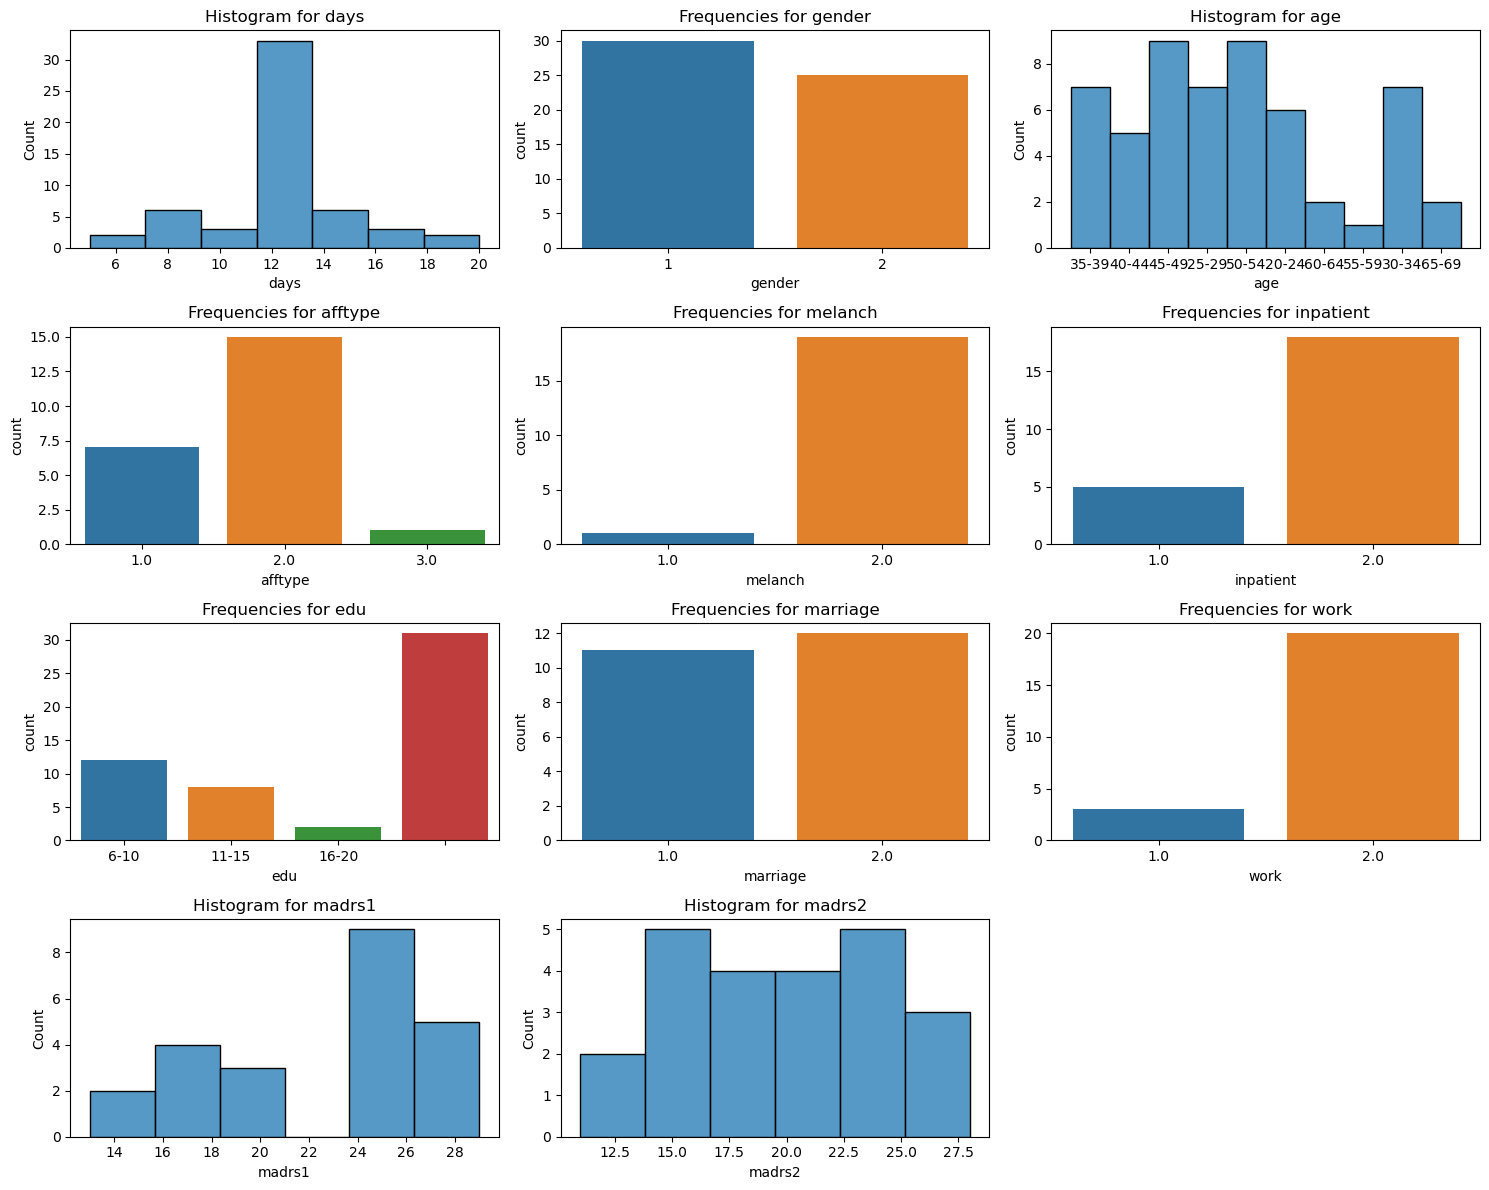

In [4]:
# Create frequency plots for each feature

# Calculate the number of rows and columns for the grid
num_rows = 4
num_cols = 3

# Create the subplots with the specified grid size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))

# Flatten the axes array
axes = axes.flatten()

# Plot EDA for each feature
for i, feature in enumerate(features):
    if feature in ['days', 'age', 'madrs1', 'madrs2']:
        sns.histplot(data=df, x=feature, ax=axes[i])
        axes[i].set_title("Histogram for " + feature)
    else:
        sns.countplot(data=df, x=feature, ax=axes[i])
        axes[i].set_title("Frequencies for " + feature)

# Remove empty subplots if any
if len(features) < num_rows * num_cols:
    for j in range(len(features), num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

# Bucket MADRS scores and afftype to fewer categories

Some observations/notes:
- afftype will have to be grouped as afftype=3 only has N=1
- MADRS is traditionally classified as normal, mild, moderate or severe based on the scores (0-6, 7-19, 20-34, 35-60 respectively)

In [5]:
# Function to classify MADRS scores
def classify_depression(madrs):
    if madrs < 7:
        return 'Normal'
    elif madrs < 20:
        return 'Mild'
    elif madrs < 35:
        return 'Moderate'
    else:
        return 'Severe'

# Create MADRS1_class variable
df['madrs1_grouped'] = df.apply(lambda row: classify_depression(row['madrs1']) if not row['number'].startswith('control') else 'Normal', axis=1)

# Create MADRS2_class variable
df['madrs2_grouped'] = df.apply(lambda row: classify_depression(row['madrs2']) if not row['number'].startswith('control') else 'Normal', axis=1)

# Create a new afftype_grouped variable
def classify_afftype(afftype):
    if afftype in [1, 3]:
        return 'Bipolar'
    elif afftype == 2:
        return 'Unipolar'
    else:
        return 'Normal'
    
df['afftype_grouped'] = df.apply(lambda row: classify_afftype(row['afftype']), axis=1)

# Display the updated DataFrame
df[['number', 'madrs1', 'madrs1_grouped', 'madrs2', 'madrs2_grouped', 'afftype_grouped']].head()

,number,madrs1,madrs1_grouped,madrs2,madrs2_grouped,afftype_grouped
0,condition_1,19.0,Mild,19.0,Mild,Unipolar
1,condition_2,24.0,Moderate,11.0,Mild,Bipolar
2,condition_3,24.0,Moderate,25.0,Moderate,Unipolar
3,condition_4,20.0,Moderate,16.0,Mild,Unipolar
4,condition_5,26.0,Moderate,26.0,Moderate,Unipolar



Frequency table for madrs1_grouped:
Normal      32
Moderate    16
Mild         7
Name: madrs1_grouped, dtype: int64

Frequency table for madrs2_grouped:
Normal      32
Moderate    12
Mild        11
Name: madrs2_grouped, dtype: int64

Frequency table for afftype_grouped:
Normal      32
Unipolar    15
Bipolar      8
Name: afftype_grouped, dtype: int64


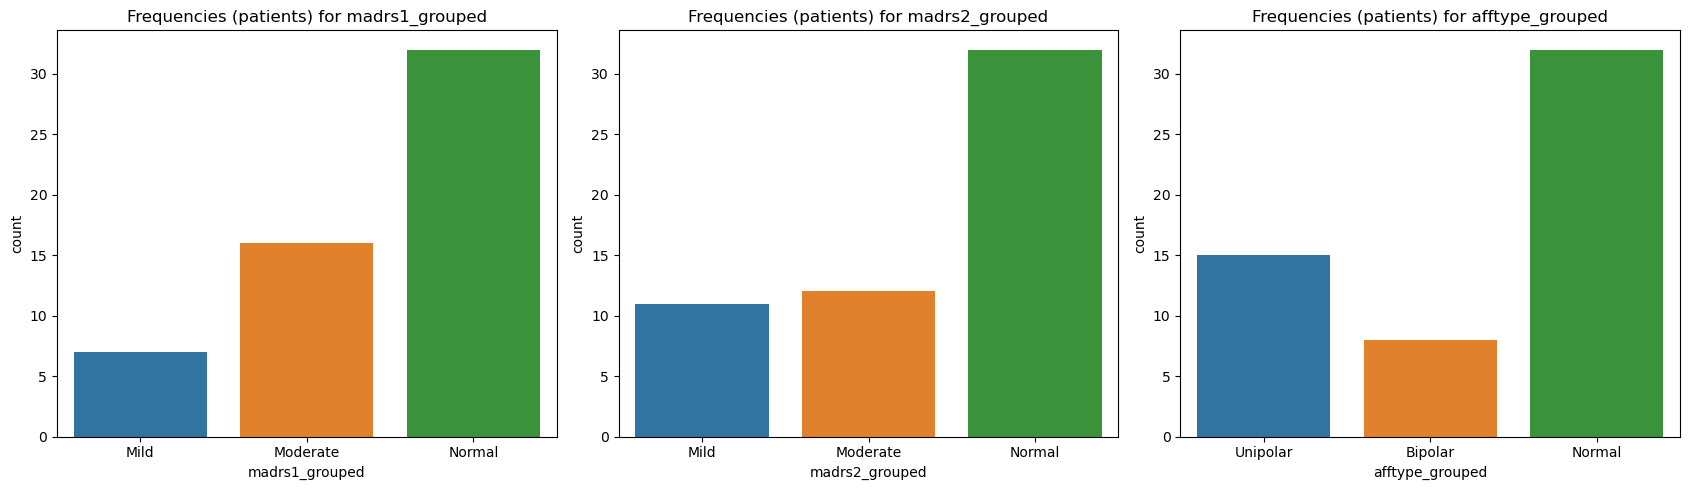

In [6]:
# Plot frequencies for the new classes
features = ['madrs1_grouped','madrs2_grouped','afftype_grouped']

# Calculate the number of rows and columns for the grid
num_rows = 1
num_cols = 3

# Create the subplots with the specified grid size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(17, 5))

# Flatten the axes array
axes = axes.flatten()

# Plot EDA for each feature
for i, feature in enumerate(features):
    sns.countplot(data=df, x=feature, ax=axes[i])
    axes[i].set_title("Frequencies (patients) for " + feature)
    print("\nFrequency table for " + feature + ":")
    print(df[feature].value_counts())

# Remove empty subplots if any
if len(features) < num_rows * num_cols:
    for j in range(len(features), num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

In [7]:
pd.crosstab(
    df['madrs1_grouped'],
    df['afftype_grouped'],
    margins=True,
    margins_name='Total'
)

afftype_grouped,Bipolar,Normal,Unipolar,Total
madrs1_grouped,,,,
Mild,3,0,4,7
Moderate,5,0,11,16
Normal,0,32,0,32
Total,8,32,15,55


In [8]:
pd.crosstab(
    df['madrs2_grouped'],
    df['afftype_grouped'],
    margins=True,
    margins_name='Total'
)

afftype_grouped,Bipolar,Normal,Unipolar,Total
madrs2_grouped,,,,
Mild,5,0,6,11
Moderate,3,0,9,12
Normal,0,32,0,32
Total,8,32,15,55


# Create composite class based on madrs_grouped and afftype_grouped

madrs2 appears to be a better label than madrs1 due to a more even distribution of values between the different classes. Also, given that the madrs2 is measured after all the motor recordings temporally it makes sense to use this over madrs1

In [9]:
# Create new composite classification
def classify(madrs_grouped, afftype_grouped):
    if afftype_grouped == "Normal":
        return "Normal"
    elif afftype_grouped == "Unipolar" and madrs_grouped == "Mild":
        return "Unipolar - Mild"
    elif afftype_grouped == "Unipolar" and madrs_grouped == "Moderate":
        return "Unipolar - Moderate"
    elif afftype_grouped == "Bipolar" and madrs_grouped == "Mild":
        return "Bipolar - Mild"
    else:
        return "Bipolar - Moderate"

df['composite_class'] = df.apply(lambda row: classify(row['madrs2_grouped'], row['afftype_grouped']), axis=1)
df[['number', 'madrs1', 'madrs1_grouped', 'madrs2', 'madrs2_grouped', 'afftype_grouped', 'composite_class']].head()

,number,madrs1,madrs1_grouped,madrs2,madrs2_grouped,afftype_grouped,composite_class
0,condition_1,19.0,Mild,19.0,Mild,Unipolar,Unipolar - Mild
1,condition_2,24.0,Moderate,11.0,Mild,Bipolar,Bipolar - Mild
2,condition_3,24.0,Moderate,25.0,Moderate,Unipolar,Unipolar - Moderate
3,condition_4,20.0,Moderate,16.0,Mild,Unipolar,Unipolar - Mild
4,condition_5,26.0,Moderate,26.0,Moderate,Unipolar,Unipolar - Moderate


Normal                 32
Unipolar - Moderate     9
Unipolar - Mild         6
Bipolar - Mild          5
Bipolar - Moderate      3
Name: composite_class, dtype: int64


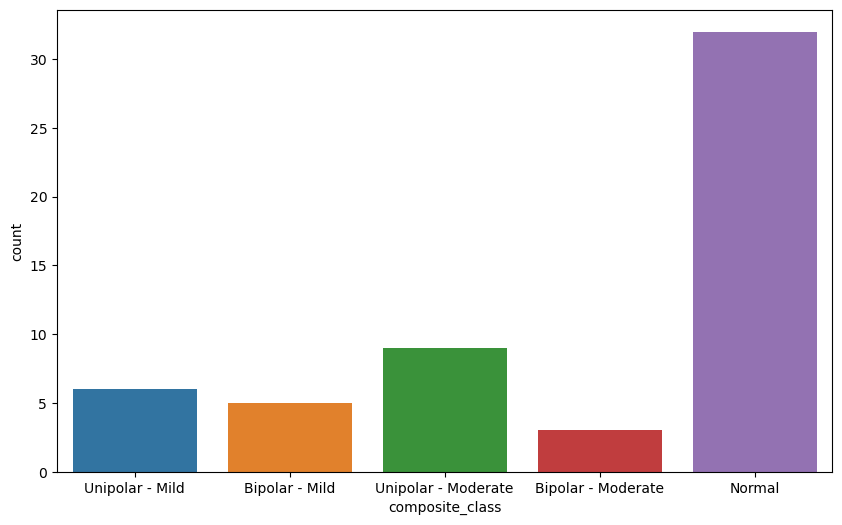

In [10]:
# Set the figure size
plt.figure(figsize=(10, 6))

# Plot frequencies for the new classes
plot = sns.countplot(data=df, x='composite_class')

# Display the frequency table
print(df['composite_class'].value_counts())

# Show the plot
plt.show()

## First pass at merging all the datasets together

In [12]:
# CONSOLIDATE ALL THE CSV FILES INTO ONE DATAFRAME
condition_directory = '../../data/raw/condition'
control_directory = '../../data/raw/control'

# Create an empty DataFrame to store the consolidated data
df_motor = pd.DataFrame()

# Get a list of all files in the condition directory
condition_files = os.listdir(condition_directory)

# Iterate over each condition file
for condition_file in condition_files:
    # Extract the number from the filename
    number = condition_file.replace('condition_', '').replace('.csv', '')
    # Read the condition file into a DataFrame
    condition_data = pd.read_csv(os.path.join(condition_directory, condition_file))
    # Add the 'number' column to the condition data
    condition_data['number'] = 'condition_' + str(number)
    # Append the condition data to the consolidated data
    df_motor = pd.concat([df_motor, condition_data], ignore_index=True)

# Get a list of all files in the control directory
control_files = os.listdir(control_directory)

# Iterate over each control file
for control_file in control_files:
    # Extract the number from the filename
    number = control_file.replace('control_', '').replace('.csv', '')
    # Read the control file into a DataFrame
    control_data = pd.read_csv(os.path.join(control_directory, control_file))
    # Add the 'number' column to the control data
    control_data['number'] = 'control_' + str(number)
    # Append the control data to the consolidated data
    df_motor = pd.concat([df_motor, control_data], ignore_index=True)

# Sort the consolidated data by timestamp and number
df_motor = df_motor.sort_values(by=['timestamp', 'number'])

# Reset the index
df_motor = df_motor.reset_index(drop=True)

# Display the consolidated data
df_motor

,timestamp,date,activity,number
0,2002-05-24 11:30:00,2002-05-24,97,condition_20
1,2002-05-24 11:31:00,2002-05-24,498,condition_20
2,2002-05-24 11:32:00,2002-05-24,249,condition_20
3,2002-05-24 11:33:00,2002-05-24,396,condition_20
4,2002-05-24 11:34:00,2002-05-24,209,condition_20
...,...,...,...,...
1571701,2006-02-14 13:34:00,2006-02-14,103,control_30
1571702,2006-02-14 13:35:00,2006-02-14,59,control_30
1571703,2006-02-14 13:36:00,2006-02-14,205,control_30
1571704,2006-02-14 13:37:00,2006-02-14,2741,control_30


In [13]:
# MERGE DF_MOTOR (TIMESTAMP MOTOR DATA) WITH DF (SCORES/PATIENT-LEVEL DATA)
# Merge the two DataFrames
df_merged = pd.merge(df, df_motor, on=['number'])
df_merged.head()

,number,days,gender,age,afftype,melanch,inpatient,edu,marriage,work,madrs1,madrs2,madrs1_grouped,madrs2_grouped,afftype_grouped,composite_class,timestamp,date,activity
0,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,Mild,Mild,Unipolar,Unipolar - Mild,2003-05-07 12:00:00,2003-05-07,0
1,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,Mild,Mild,Unipolar,Unipolar - Mild,2003-05-07 12:01:00,2003-05-07,143
2,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,Mild,Mild,Unipolar,Unipolar - Mild,2003-05-07 12:02:00,2003-05-07,0
3,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,Mild,Mild,Unipolar,Unipolar - Mild,2003-05-07 12:03:00,2003-05-07,20
4,condition_1,11,2,35-39,2.0,2.0,2.0,6-10,1.0,2.0,19.0,19.0,Mild,Mild,Unipolar,Unipolar - Mild,2003-05-07 12:04:00,2003-05-07,166



Frequency table for madrs1_grouped:
Normal      1019990
Moderate     374575
Mild         177141
Name: madrs1_grouped, dtype: int64

Frequency table for madrs2_grouped:
Normal      1019990
Mild         278568
Moderate     273148
Name: madrs2_grouped, dtype: int64

Frequency table for afftype_grouped:
Normal      1019990
Unipolar     357716
Bipolar      194000
Name: afftype_grouped, dtype: int64

Frequency table for composite_class:
Normal                 1019990
Unipolar - Moderate     208508
Unipolar - Mild         149208
Bipolar - Mild          129360
Bipolar - Moderate       64640
Name: composite_class, dtype: int64


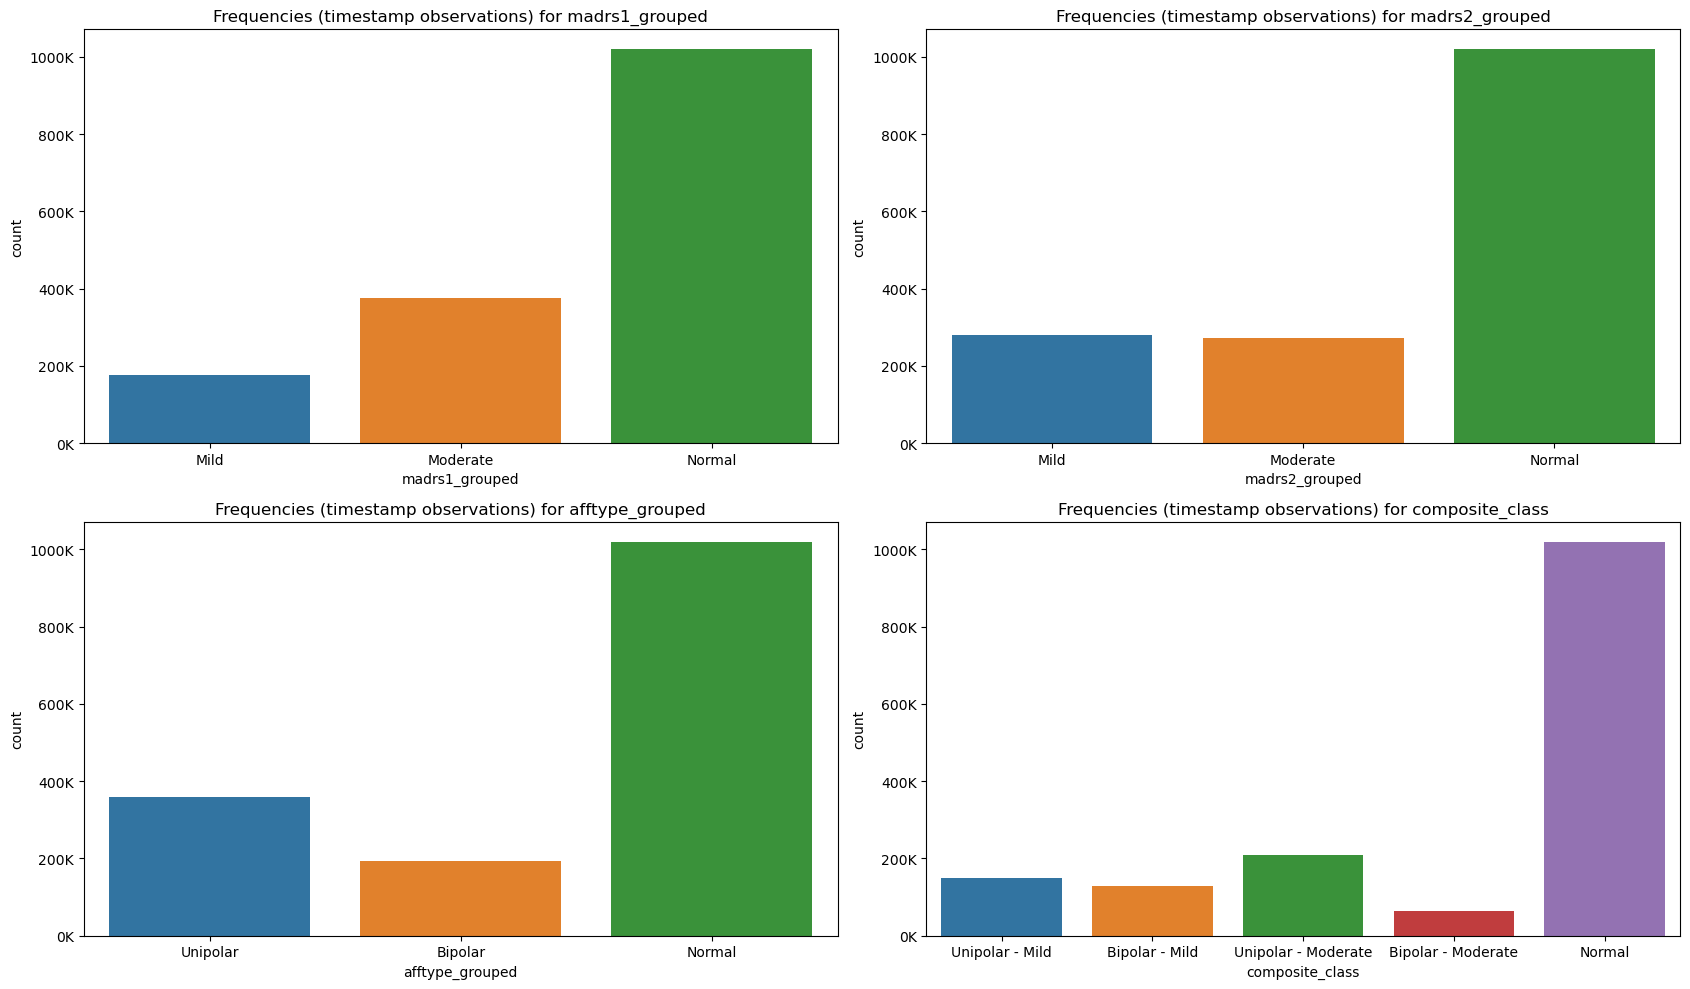

In [14]:
# DISPLAY FREQUENCIES OF THE NEW MERGED DATA FRAME
# Plot frequencies for the new classes
features = ['madrs1_grouped','madrs2_grouped','afftype_grouped', 'composite_class']

# Calculate the number of rows and columns for the grid
num_rows = 2
num_cols = 2

# Create the subplots with the specified grid size
fig, axes = plt.subplots(num_rows, num_cols, figsize=(17, 10))

# Flatten the axes array
axes = axes.flatten()

# Plot EDA for each feature
for i, feature in enumerate(features):
    sns.countplot(data=df_merged, x=feature, ax=axes[i])
    axes[i].set_title("Frequencies (timestamp observations) for " + feature)
    axes[i].yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}K'.format(x * 1e-3)))  # Format y-axis labels in thousands
    print("\nFrequency table for " + feature + ":")
    print(df_merged[feature].value_counts())

# Remove empty subplots if any
if len(features) < num_rows * num_cols:
    for j in range(len(features), num_rows * num_cols):
        fig.delaxes(axes[j])

# Adjust the layout and display the plot
plt.tight_layout()
plt.show()

## Feature engineering analysis

In [19]:
df_feature = df_merged[['number', 'madrs2', 'madrs2_grouped', 'timestamp','date','activity']]
df_feature.head()

,number,madrs2,madrs2_grouped,timestamp,date,activity
0,condition_1,19.0,Mild,2003-05-07 12:00:00,2003-05-07,0
1,condition_1,19.0,Mild,2003-05-07 12:01:00,2003-05-07,143
2,condition_1,19.0,Mild,2003-05-07 12:02:00,2003-05-07,0
3,condition_1,19.0,Mild,2003-05-07 12:03:00,2003-05-07,20
4,condition_1,19.0,Mild,2003-05-07 12:04:00,2003-05-07,166


In [30]:
df_feature.groupby(['number','date'])['activity'].mean()

number       date      
condition_1  2003-05-07    174.144444
             2003-05-08    156.247222
             2003-05-09    124.135417
             2003-05-10    134.961806
             2003-05-11     99.439583
                              ...    
control_9    2003-11-27      5.781250
             2003-11-28      6.401389
             2003-11-29      6.887500
             2003-11-30      7.000000
             2003-12-01     24.488432
Name: activity, Length: 1144, dtype: float64

In [31]:
df_feature.groupby(['number','date'])['activity'].size()

number       date      
condition_1  2003-05-07     720
             2003-05-08    1440
             2003-05-09    1440
             2003-05-10    1440
             2003-05-11    1440
                           ... 
control_9    2003-11-27    1440
             2003-11-28    1440
             2003-11-29    1440
             2003-11-30    1440
             2003-12-01     778
Name: activity, Length: 1144, dtype: int64

In [36]:
df_feature.groupby('number').date.nunique()

number
condition_1     17
condition_10    16
condition_11    17
condition_12    16
condition_13    19
condition_14    16
condition_15    16
condition_16    30
condition_17    16
condition_18    16
condition_19    16
condition_2     28
condition_20    19
condition_21    15
condition_22    16
condition_23    23
condition_3     16
condition_4     16
condition_5     16
condition_6     16
condition_7     16
condition_8     14
condition_9     15
control_1       37
control_10      16
control_11      18
control_12      25
control_13      16
control_14      16
control_15      16
control_16      18
control_17      21
control_18      18
control_19      20
control_2       23
control_20      23
control_21      23
control_22      16
control_23      16
control_24      16
control_25      16
control_26      24
control_27      15
control_28      18
control_29      18
control_3       47
control_30      16
control_31      37
control_32      37
control_4       23
control_5       34
control_6       37
contr

In [32]:
df_feature.groupby(['number','date'])['activity'].std()

number       date      
condition_1  2003-05-07    240.053885
             2003-05-08    229.109777
             2003-05-09    211.241278
             2003-05-10    230.954732
             2003-05-11    177.719972
                              ...    
control_9    2003-11-27      8.760265
             2003-11-28      0.916226
             2003-11-29      0.460968
             2003-11-30      0.000000
             2003-12-01     96.043858
Name: activity, Length: 1144, dtype: float64

In [34]:
df_feature.groupby(['number','date']).agg(lambda x: x.eq(0).sum())

madrs2  madrs2_grouped  timestamp  activity
number      date                                                   
condition_1 2003-05-07       0               0          0       147
            2003-05-08       0               0          0       589
            2003-05-09       0               0          0       665
            2003-05-10       0               0          0       539
            2003-05-11       0               0          0       605
...                        ...             ...        ...       ...
control_9   2003-11-27       0               0          0         0
            2003-11-28       0               0          0         0
            2003-11-29       0               0          0         0
            2003-11-30       0               0          0         0
            2003-12-01       0               0          0         0

[1144 rows x 4 columns]

To do: look at stat of each day to see if there is any non-normality per number